In [740]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.linear_model import LogisticRegression

In [741]:
df=pd.read_csv('quikr_car.csv')

In [742]:
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [743]:
df['name'].value_counts()

name
Honda City                         13
Honda Amaze                        11
Maruti Suzuki Dzire                10
Mahindra Scorpio S10                9
Maruti Suzuki Alto 800 Lxi          9
                                   ..
Mahindra Bolero DI BSII             1
Audi Q3 2.0 TDI quattro Premium     1
Skoda Superb 1.8 TFSI AT            1
BMW 5 Series 520d Sedan             1
Chevrolet Sail 1.2 LT ABS           1
Name: count, Length: 525, dtype: int64

In [744]:
import seaborn as sns

In [745]:
df['Price'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 892 entries, 0 to 891
Series name: Price
Non-Null Count  Dtype 
--------------  ----- 
892 non-null    object
dtypes: object(1)
memory usage: 7.1+ KB


In [746]:
df['Price'].value_counts()

Price
Ask For Price    35
2,50,000         17
3,50,000         14
1,80,000         13
1,30,000         12
                 ..
7,49,999          1
11,30,000         1
10,74,999         1
3,24,999          1
5,00,001          1
Name: count, Length: 274, dtype: int64

In [747]:
df=df[df['Price']!="Ask For Price"]

In [748]:
df['Price']=df['Price'].str.replace(",","")

In [749]:
df['Price']=df['Price'].astype(int)

In [750]:
df.shape

(857, 6)

In [751]:
df['Price'].info()

<class 'pandas.core.series.Series'>
Index: 857 entries, 0 to 891
Series name: Price
Non-Null Count  Dtype
--------------  -----
857 non-null    int32
dtypes: int32(1)
memory usage: 10.0 KB


<Axes: xlabel='name', ylabel='Price'>

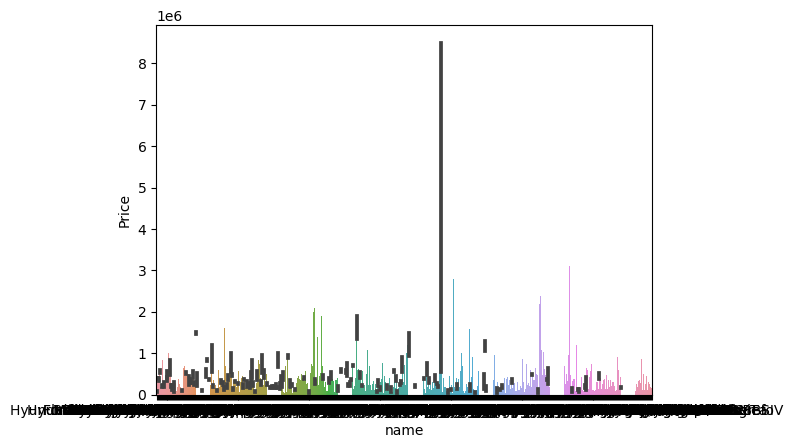

In [752]:
sns.barplot(x='name', y='Price', data=df)

In [753]:
df['year'].unique()

array(['2007', '2006', '2014', '2012', '2013', '2016', '2015', '2010',
       '2017', '2008', '2018', '2011', '2019', '2009', '2005', '2000',
       '150k', 'TOUR', '2003', 'r 15', '2004', 'sale', '1995', 'ara)',
       '2002', 'SELL', '2001', 'tion', 'odel', '2 bs', 'arry', 'o...',
       'Zest', 'ture', 'emi', 'car', 'able', 'd...', 'SALE', 'sell',
       'd Ex', 'n...', 'e...', 'go .', 'k...', 'o c4', 'zire', 'Sumo',
       'cab', 'EV2', 'r...', 'zest'], dtype=object)

In [754]:
df=df[df['year'].str.isnumeric()]


In [755]:
df['year'].unique()

array(['2007', '2006', '2014', '2012', '2013', '2016', '2015', '2010',
       '2017', '2008', '2018', '2011', '2019', '2009', '2005', '2000',
       '2003', '2004', '1995', '2002', '2001'], dtype=object)

In [756]:
df['year']=df['year'].astype(int)

In [757]:
df['kms_driven'].unique()

array(['45,000 kms', '40 kms', '28,000 kms', '36,000 kms', '41,000 kms',
       '25,000 kms', '24,530 kms', '60,000 kms', '30,000 kms',
       '32,000 kms', '48,660 kms', '4,000 kms', '16,934 kms',
       '43,000 kms', '35,550 kms', '39,522 kms', '39,000 kms',
       '55,000 kms', '72,000 kms', '15,975 kms', '70,000 kms',
       '23,452 kms', '35,522 kms', '48,508 kms', '15,487 kms',
       '82,000 kms', '20,000 kms', '68,000 kms', '38,000 kms',
       '27,000 kms', '33,000 kms', '46,000 kms', '16,000 kms',
       '47,000 kms', '35,000 kms', '30,874 kms', '15,000 kms',
       '29,685 kms', '1,30,000 kms', '19,000 kms', '54,000 kms',
       '13,000 kms', '38,200 kms', '22,000 kms', '50,000 kms',
       '13,500 kms', '3,600 kms', '45,863 kms', '60,500 kms',
       '12,500 kms', '18,000 kms', '13,349 kms', '29,000 kms',
       '44,000 kms', '42,000 kms', '14,000 kms', '49,000 kms',
       '36,200 kms', '51,000 kms', '1,04,000 kms', '33,333 kms',
       '33,600 kms', '5,600 kms', '7,500 km

In [758]:
df=df[df['kms_driven']!="Petrol"]

In [759]:
df['kms_driven']=df['kms_driven'].str.replace(",","")

In [760]:
df['kms_driven']

0       45000 kms
1          40 kms
3       28000 kms
4       36000 kms
6       41000 kms
          ...    
883     50000 kms
885     30000 kms
886    132000 kms
888     27000 kms
889     40000 kms
Name: kms_driven, Length: 817, dtype: object

In [761]:
df['kms_driven']=df['kms_driven'].str.split(" ").apply(lambda x: x[0])

In [762]:
df['kms_driven']=df['kms_driven'].astype(int)

In [763]:
df['fuel_type'].value_counts()

fuel_type
Petrol    428
Diesel    386
LPG         2
Name: count, dtype: int64

In [764]:
df['Price'].value_counts()

Price
250000     16
350000     12
400000     11
130000     11
210000     10
           ..
749999      1
1130000     1
1074999     1
324999      1
500001      1
Name: count, Length: 272, dtype: int64

In [765]:
df['company'].value_counts()
import matplotlib.pyplot as plt

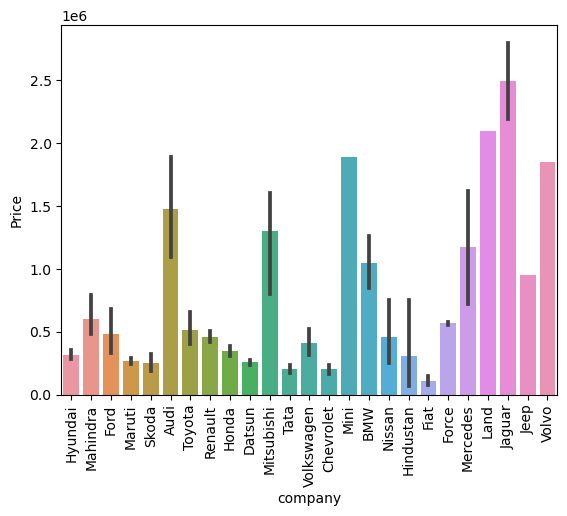

In [766]:
sns.barplot(x='company', y='Price', data=df)

# Rotate the x-axis labels
plt.xticks(rotation=90)

# Display the plot
plt.show()

<Axes: >

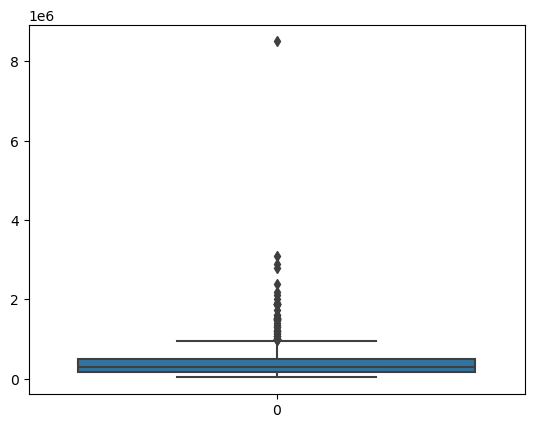

In [767]:
sns.boxplot(df['Price'])

In [768]:
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)

# Compute the IQR
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
df = df[(df['Price'] >= lower_bound) & (df['Price'] <= upper_bound)]

In [769]:
df.shape

(764, 6)

In [770]:
df.shape

(764, 6)

In [771]:
X = df.drop(['Price'], axis=1)
y = df['Price']

In [772]:
df.isnull().sum()

name          0
company       0
year          0
Price         0
kms_driven    0
fuel_type     1
dtype: int64

In [773]:
numeric_features = ['kms_driven','year']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

In [774]:
categorical_features = ['name','company','fuel_type']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [775]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [776]:
from sklearn.linear_model import LinearRegression


In [777]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor',LogisticRegression())
])

In [778]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=655)

In [779]:
model.fit(X_train, y_train)

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  ['kms_driven', 'year']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['name', 'company',
                                                   'fuel_type'])])),
                ('regressor', LogisticRegression())])

In [780]:
y_pred = model.predict(X_test)

In [781]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score

In [782]:
r2_score(y_test, y_pred)

0.9996571870997306

In [783]:

import pickle
pickle.dump(model,open('pipe.pkl','wb'))

In [784]:
df['name'].unique()

array(['Hyundai Santro Xing XO eRLX Euro III', 'Mahindra Jeep CL550 MDI',
       'Hyundai Grand i10 Magna 1.2 Kappa VTVT',
       'Ford EcoSport Titanium 1.5L TDCi', 'Ford Figo', 'Hyundai Eon',
       'Ford EcoSport Ambiente 1.5L TDCi',
       'Maruti Suzuki Alto K10 VXi AMT', 'Skoda Fabia Classic 1.2 MPI',
       'Maruti Suzuki Stingray VXi', 'Hyundai Elite i20 Magna 1.2',
       'Mahindra Scorpio SLE BS IV', 'Audi Q7', 'Mahindra Scorpio S10',
       'Maruti Suzuki Alto 800', 'Maruti Suzuki Alto 800 Vxi',
       'Hyundai i20 Sportz 1.2', 'Maruti Suzuki Alto 800 Lx',
       'Maruti Suzuki Vitara Brezza ZDi', 'Maruti Suzuki Alto LX',
       'Mahindra Bolero DI', 'Maruti Suzuki Swift Dzire ZDi',
       'Mahindra Scorpio S10 4WD', 'Maruti Suzuki Swift Vdi BSIII',
       'Maruti Suzuki Wagon R VXi BS III',
       'Maruti Suzuki Wagon R VXi Minor',
       'Toyota Innova 2.0 G 8 STR BS IV', 'Renault Lodgy 85 PS RXL',
       'Skoda Yeti Ambition 2.0 TDI CR 4x2',
       'Maruti Suzuki Baleno D

In [785]:
df['year'].unique()

array([2007, 2006, 2014, 2012, 2013, 2016, 2015, 2010, 2017, 2008, 2018,
       2011, 2009, 2005, 2000, 2019, 2003, 2004, 1995, 2002, 2001])

In [786]:
X_train['fuel_type'].unique()

array(['Diesel', 'Petrol', nan, 'LPG'], dtype=object)

In [787]:
X_train.isnull().sum()

name          0
company       0
year          0
kms_driven    0
fuel_type     1
dtype: int64

In [788]:
X_train


,name,company,year,kms_driven,fuel_type
885,Tata Indica V2 DLE BS III,Tata,2009,30000,Diesel
22,Maruti Suzuki Alto 800 Vxi,Maruti,2015,39000,Petrol
325,Maruti Suzuki Vitara Brezza,Maruti,2016,29000,Diesel
620,Skoda Octavia Classic 1.9 TDI MT,Skoda,2006,65000,Diesel
830,Mahindra Scorpio VLX 2.2 mHawk Airbag BSIV,Mahindra,2014,77000,Diesel
...,...,...,...,...,...
131,Chevrolet Beat,Chevrolet,2015,30000,Petrol
459,Honda City SV,Honda,2017,4000,Petrol
200,Maruti Suzuki Wagon R LXI BS IV,Maruti,2011,35000,Petrol
438,Hyundai i20 Magna 1.2,Hyundai,2010,36000,Petrol


In [791]:
df[(df['company'] == "Datsun") & (df['name'] == "Datsun Go Plus")]['Price']


837    285000
Name: Price, dtype: int32